In [4]:
import pandas_datareader
import seaborn as sns
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# グリッドサーチを行う
from sklearn.model_selection import GridSearchCV
# 訓練したモデルの保存や呼び出し
import joblib
# Google画像を検索を簡単行える
from icrawler.builtin import GoogleImageCrawler
#  Webブラウザの操作を自動化する
import selenium
from selenium import webdriver

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,t
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# 相関係数を表示
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,t
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [4]:
# 教師データtと各入力変数の相関関係を確認したい場合
df.corr()['t']

x1    -0.388305
x2     0.360445
x3    -0.483725
x4     0.175260
x5    -0.427321
x6     0.695360
x7    -0.376955
x8     0.249929
x9    -0.381626
x10   -0.468536
x11   -0.507787
x12    0.333461
x13   -0.737663
t      1.000000
Name: t, dtype: float64

<IPython.core.display.Javascript object>


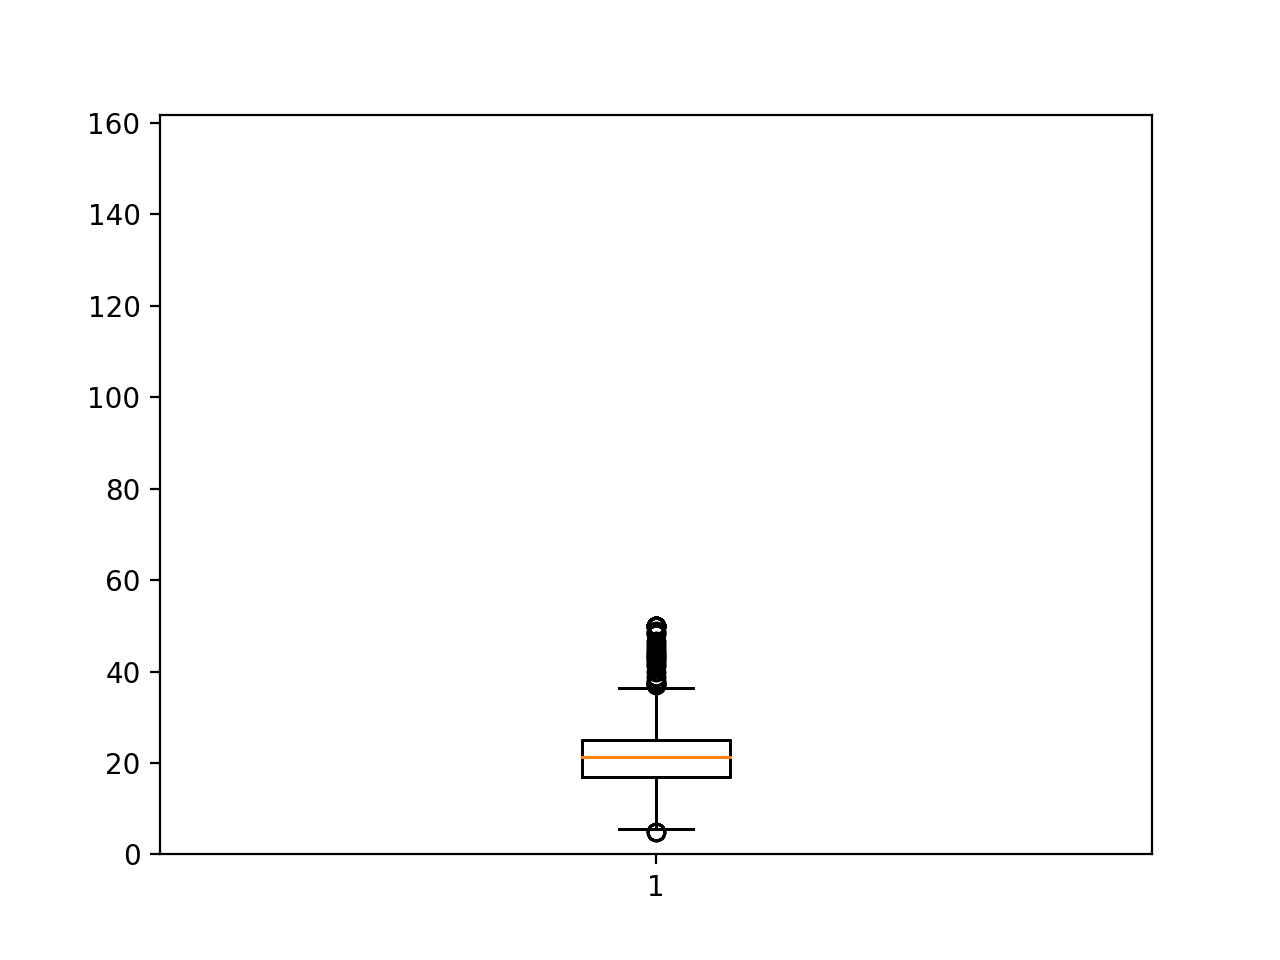

In [9]:
plt.hist(df['t'])
plt.show()

In [11]:
# binの数はデフォルトで10なので詳細にしたい場合は引数で指定する
plt.hist(df['t'], bins=30)
plt.show()

<IPython.core.display.Javascript object>


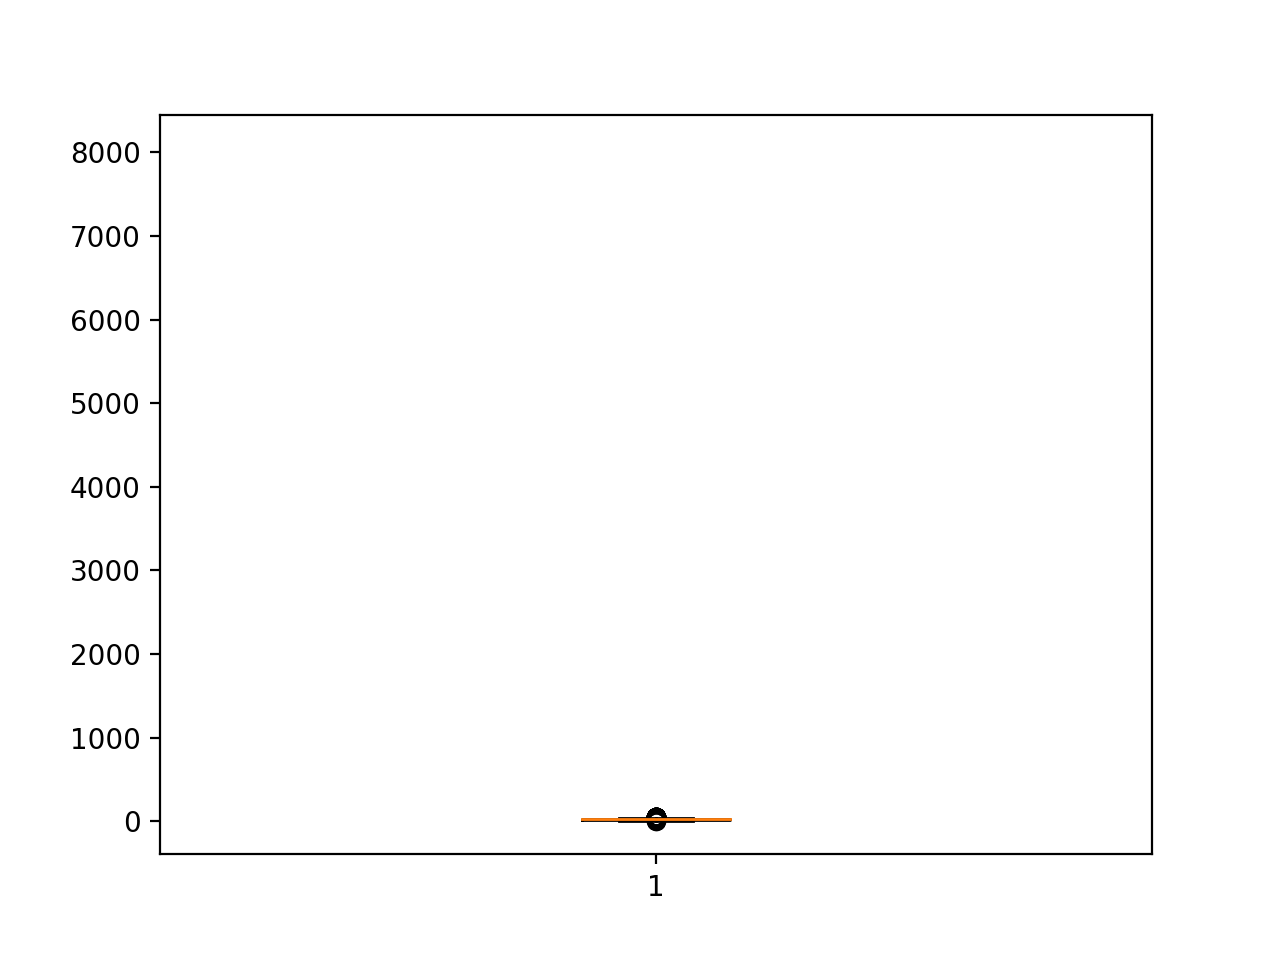

In [15]:
# 箱ひげ図
plt.boxplot(df['t'])
plt.show()

In [17]:
# datareaderパッケージを使うと株価データを取得できる
# 以下はトヨタ自動車株式会社のデータ。銘柄コード7203
df = pandas_datareader.data.DataReader('7203.JP', 'stooq')
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-11,7200.0,7278.0,7160.0,7269.0,4755500
2019-10-10,7105.0,7124.0,7012.0,7108.0,3617500
2019-10-09,7036.0,7141.0,7031.0,7125.0,4903400
2019-10-08,7020.0,7104.0,7015.0,7087.0,4833500
2019-10-07,7044.0,7049.0,6970.0,6986.0,3015500


<IPython.core.display.Javascript object>


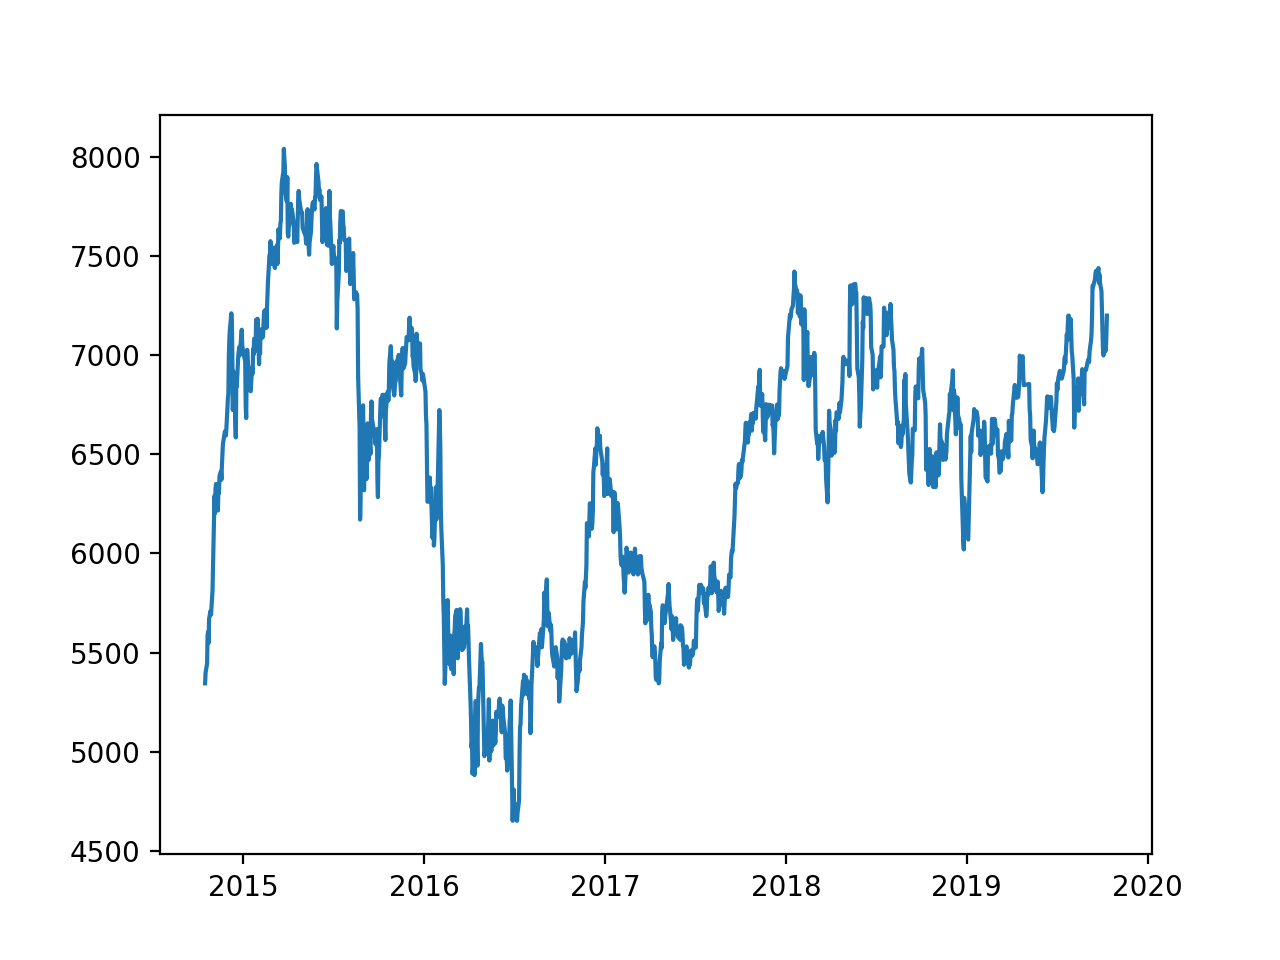

In [20]:
plt.plot(df['Open'])
plt.show()

<IPython.core.display.Javascript object>


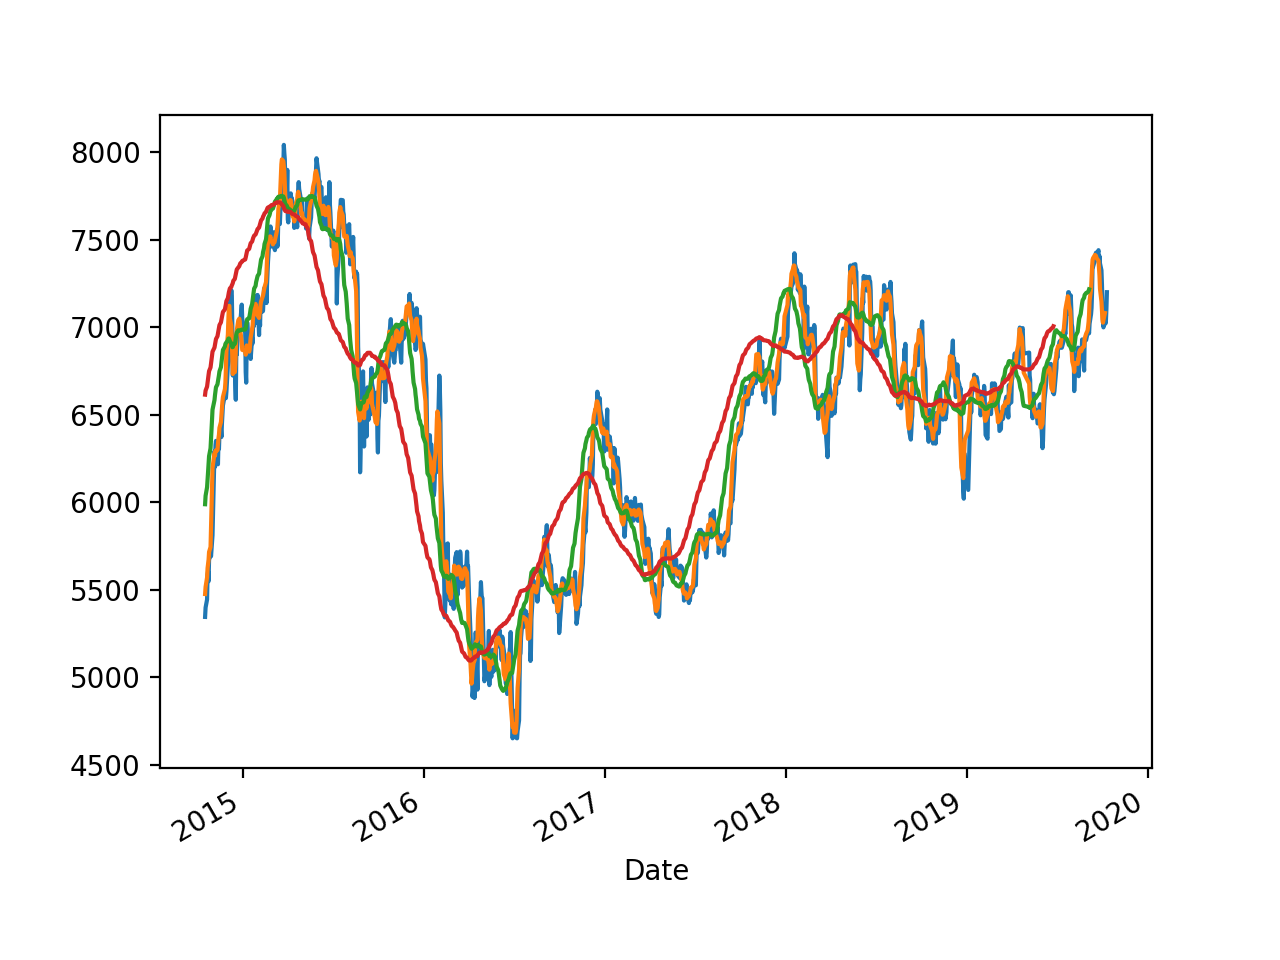

In [21]:
# rollingを使うと移動平均を算出できる
df['Open'].plot()
df['Open'].rolling(5).mean().plot() # 5日移動平均
df['Open'].rolling(25).mean().plot() # 25日移動平均
df['Open'].rolling(75).mean().plot() # 75日移動平均

<IPython.core.display.Javascript object>


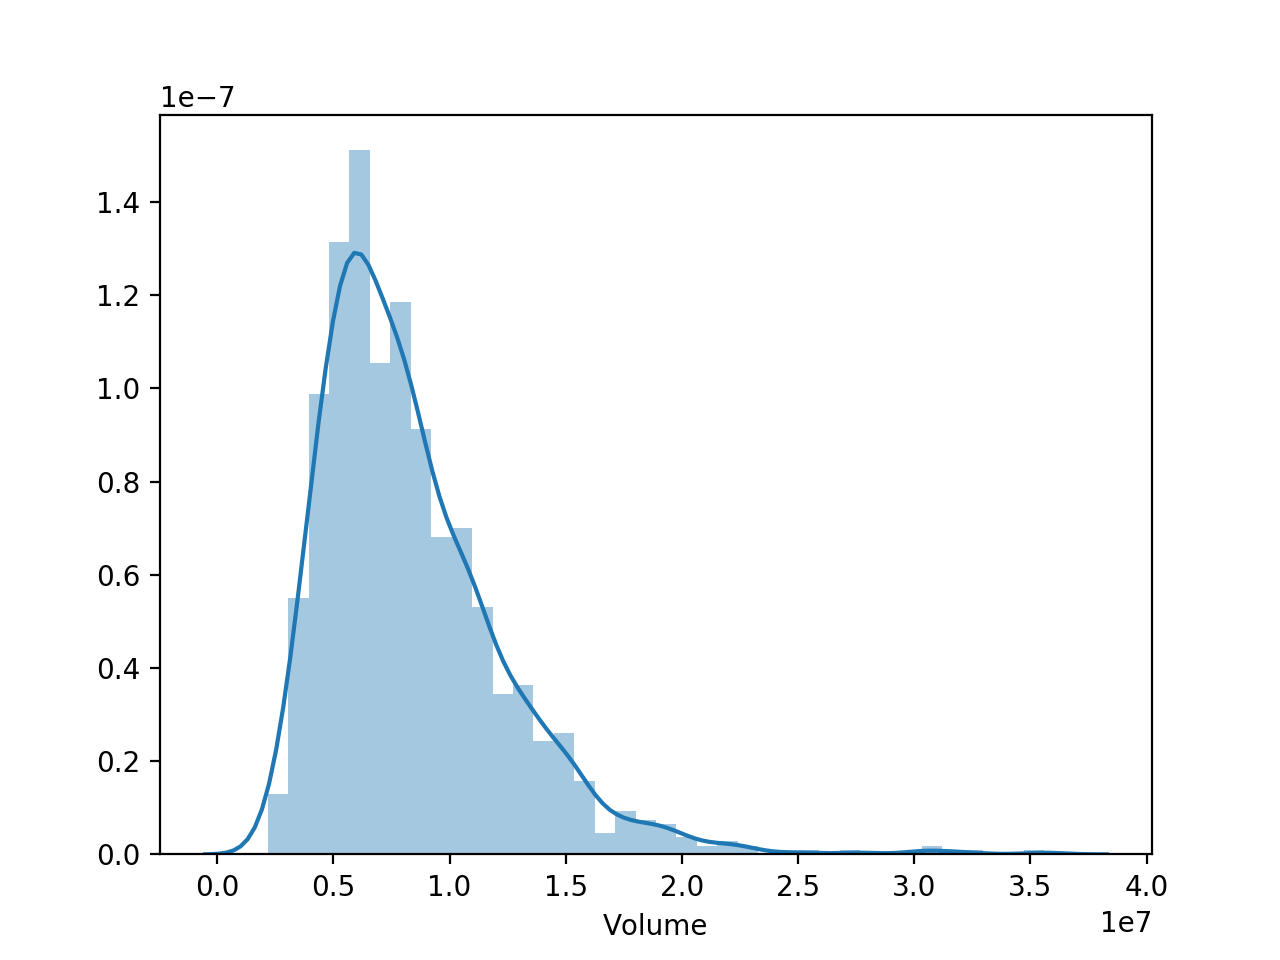

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [25]:
## displot :  データの分布を確認できる
sns.distplot(df['Volume'])

In [6]:
## pairplot : 相関関係の一覧を確認する
# df = pd.read_csv("housing.csv")
# sns.pairplot(df)

In [7]:
breast_cancer = load_breast_cancer()

In [8]:
# 説明変数と目的変数に分ける
x = breast_cancer['data']
t = breast_cancer['target']

In [9]:
# データ型と行列のサイズの確認
type(x), x.shape

(numpy.ndarray, (569, 30))

In [10]:
# データ型と行列のサイズの確認
type(t), t.shape

(numpy.ndarray, (569,))

In [36]:
# 以上より569件の診断ケース、説明変数は30項目あることがわかる

In [11]:
# 正解ラベルのサンプル数を確認する。不均衡なデータだと正しい学習ができないため
len(t[t==0]), len(t[t==1])

(212, 357)

In [12]:
# precisionやrecallの計算のため、議論の対象にしたいカテゴリに1を割り振っておく
# 今回悪性が0、良性が1としてラベルがつけられているため、悪性を1、良性を0に変更する

# tが0の場合は1として、それ以外を0とする
t = np.where(t==0,1,0)

<IPython.core.display.Javascript object>


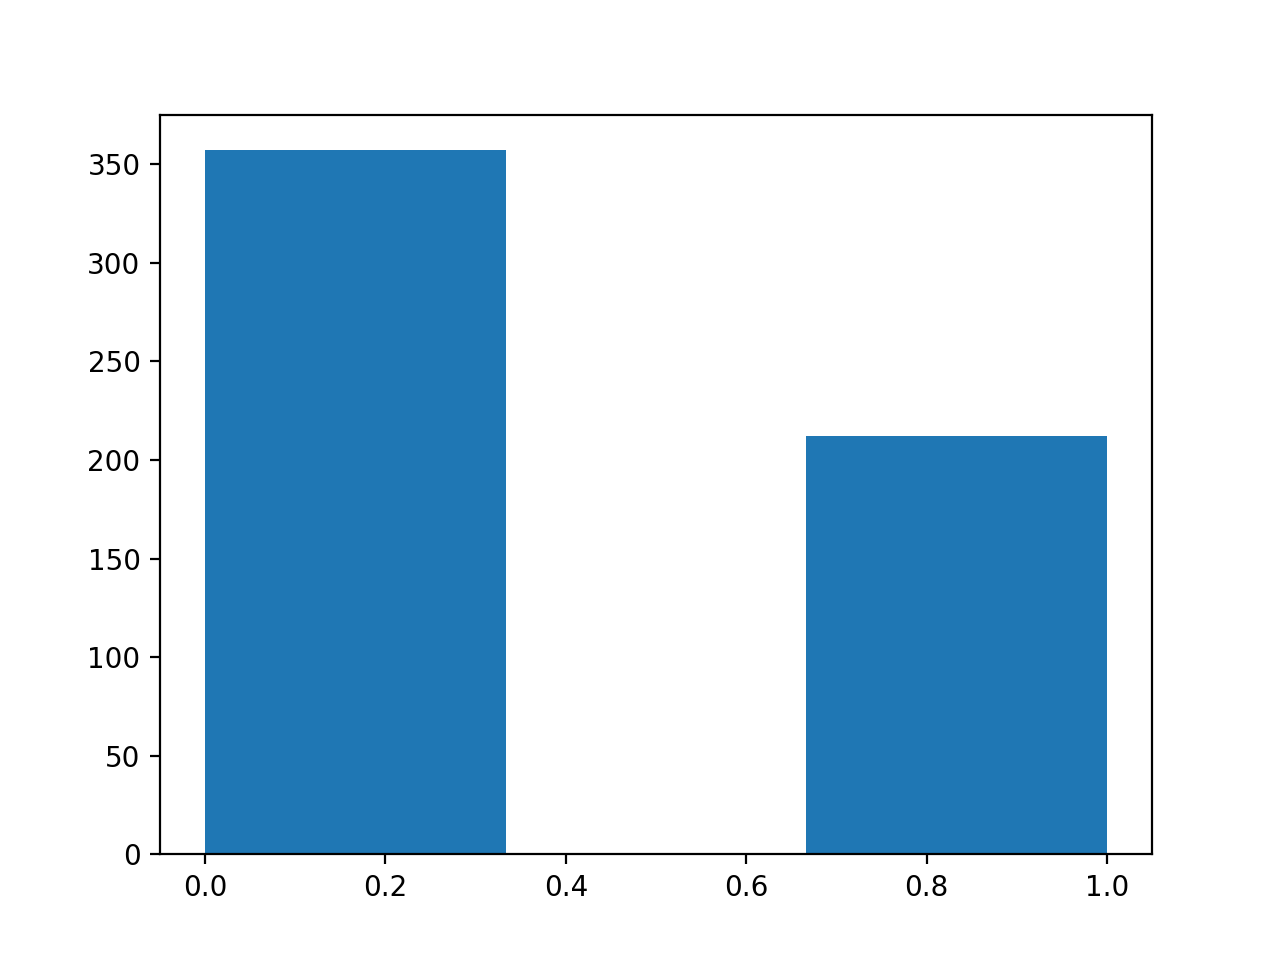

(array([357.,   0., 212.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

In [42]:
# ラベルをヒストグラムでも確認
plt.hist(t, bins=3)

In [13]:
# 訓練データとテストデータを分ける
# 全体の20%をテスト用に分割する
x_train,x_test,t_train,t_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [14]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [15]:
t_train.shape, t_test.shape

((455,), (114,))

In [16]:
from sklearn.tree import DecisionTreeClassifier

# モデルをインスタンス化
clf = DecisionTreeClassifier(random_state=0)

In [17]:
# 訓練データに基づいて、パラメータの訓練
clf.fit(x_train,t_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
# テストデータに対する予測値の計算
y_test = clf.predict(x_test)

In [19]:
# テストデータに対する正解率の算出
clf.score(x_test,t_test)

0.9122807017543859

In [20]:
# オーバーフィッティングやアンダーフィッテイングでないか確認するため訓練データでも正解率を算出する
clf.score(x_train,t_train)

1.0

In [22]:
# 混同行列を算出
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(t_test, y_test)
matrix

array([[60,  7],
       [ 3, 44]])

<IPython.core.display.Javascript object>


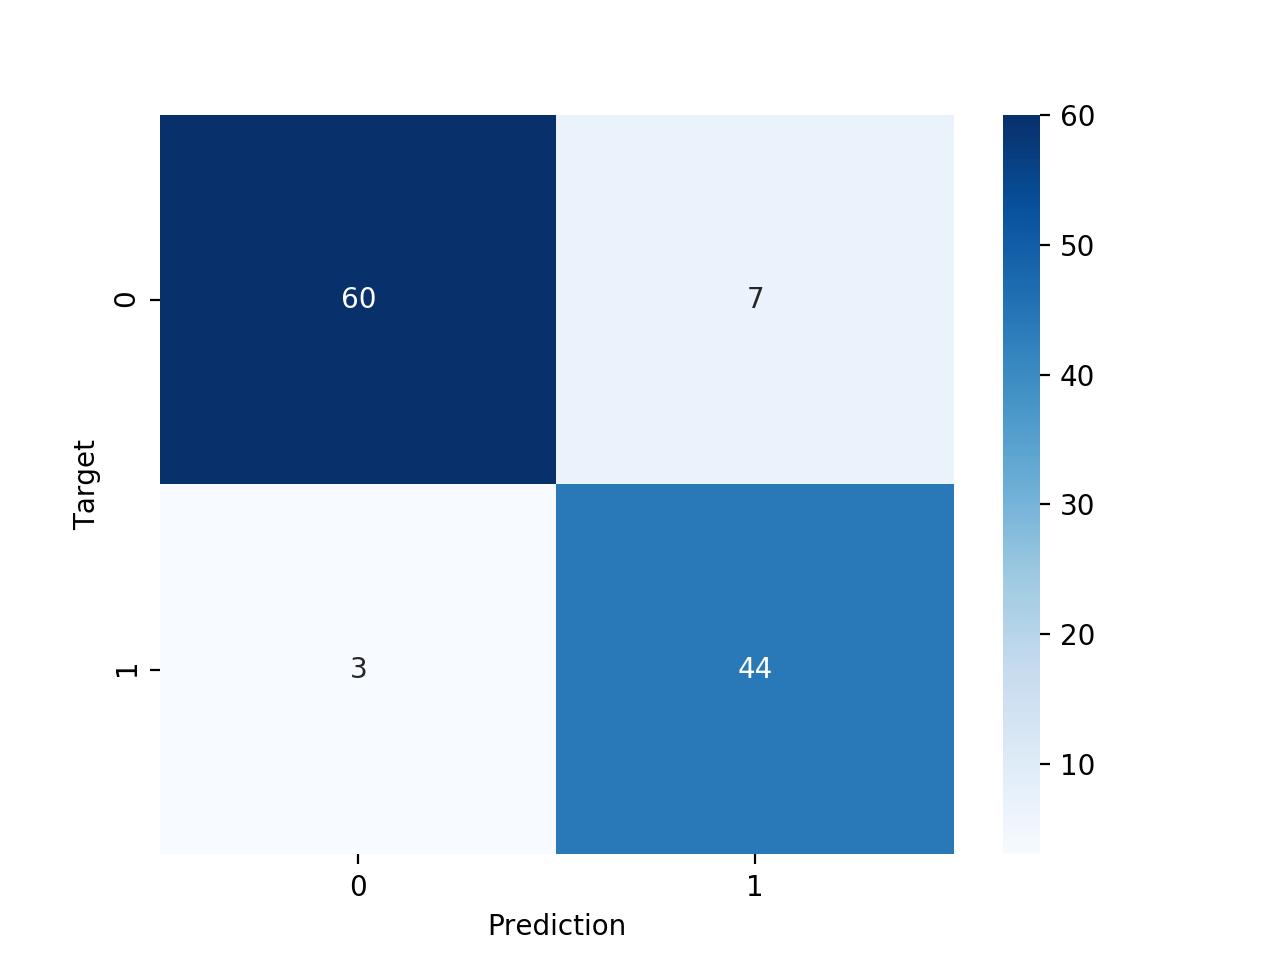

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/

Text(50.7222,0.5,'Target')

In [23]:
import seaborn as sns
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')

In [57]:
# Precision :  予測値がPositiveと判定された中でどの程度正解していたかを算出
# Precision = TP / (TP + FP) 
# 悪性である（positive）を予測した中で、どのくらい正解しているか
from sklearn.metrics import precision_score
precision_score(t_test,y_test)

0.8627450980392157

In [58]:
# Recall : 教師データがPositiveであるサンプルに対して、どの程度正解していたか
# Recall = TP / (FN + TP)
from sklearn.metrics import recall_score
recall_score(t_test,y_test)

0.9361702127659575

In [59]:
# F1score : PrecisionとRecallのバランスを見る指標
# F1score = 2 * (Precision * Recall) / (Precision + Recall)
from sklearn.metrics import f1_score
f1_score(t_test,y_test)

0.8979591836734694

In [24]:
# 以下のとおり今回のデータにはサンプルに偏りがある
len(t[t==0]), len(t[t==1])

(357, 212)

In [25]:
# 悪性（Positive）が少ないため結果もTPとFPが少なくなる
# 悪性のデータを大きく評価し、良性のデータを小さく評価する。これを重み付けという
# 重みは全体のデータ数に対する各カテゴリのデータ数の割合の逆数で求める
weight = {
    0: len(t) / len(t[t==0]),
    1: len(t) / len(t[t==1])
}
weight

{0: 1.5938375350140057, 1: 2.6839622641509435}

In [66]:
# このようにして得られた重みを決定木アルゴリズムに渡すと、重みによる傾斜をつけた学習を行うことができる
clf = DecisionTreeClassifier(random_state=0, class_weight=weight)
# モデルの訓練
clf.fit(x_train, t_train)

DecisionTreeClassifier(class_weight={0: 1.5938375350140057, 1: 2.6839622641509435},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [67]:
clf.score(x_test,t_test)

0.9210526315789473

In [68]:
y_test = clf.predict(x_test)

In [69]:
precision_score(t_test,y_test), recall_score(t_test,y_test)
# 重み付けをしたことによりPrecisionが上がった。Recallは変化せず

(0.88, 0.9361702127659575)

In [27]:
# ハイパーパラメータのチューニングのために訓練データでもテストデータでもない、検証データを導入する
# そのため交差検証を行う
# max_depthはハイパーパラメータ
# ジニ係数giniとエントロピーentropyもハイパーパラメータ。
# 決定木の深さごとにジニ係数とエントロピーに対して総当たりで訓練を行い最適な組み合わせを見つける
# グリッドサーチとはハイパーパラメーターの候補を列挙して、全てのパターンで試して最も良かった組み合わせを採用する方法

from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": list(range(2,10)),
    "criterion": ["gini", "entropy"]
}

# scoringは指定しない場合Accuracy
# cvは交差検証の分割数
clf_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight=weight, random_state=0),
    scoring = "recall",
    param_grid = params,
    cv = 5,
)

In [28]:
# 全てのハイパーパラメータの候補で訓練
clf_grid.fit(x_train, t_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight={0: 1.5938375350140057, 1: 2.6839622641509435},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [29]:
# 最も良かったパラメータの組み合わせ
clf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [30]:
# 最も良かったハイパーパラメータを持つ訓練済みモデルを受け継ぐ
clf = clf_grid.best_estimator_
clf.fit(x_train, t_train)

DecisionTreeClassifier(class_weight={0: 1.5938375350140057, 1: 2.6839622641509435},
            criterion='entropy', max_depth=2, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [31]:
# 正解率を算出
clf.score(x_test, t_test)

0.9210526315789473

In [32]:
# 予測値の計算
y_test = clf.predict(x_test)

In [34]:
# precision, recall, f1_scoreを算出
precision_score(t_test, y_test), recall_score(t_test, y_test), f1_score(t_test, y_test)

(0.8392857142857143, 1.0, 0.9126213592233009)

<IPython.core.display.Javascript object>


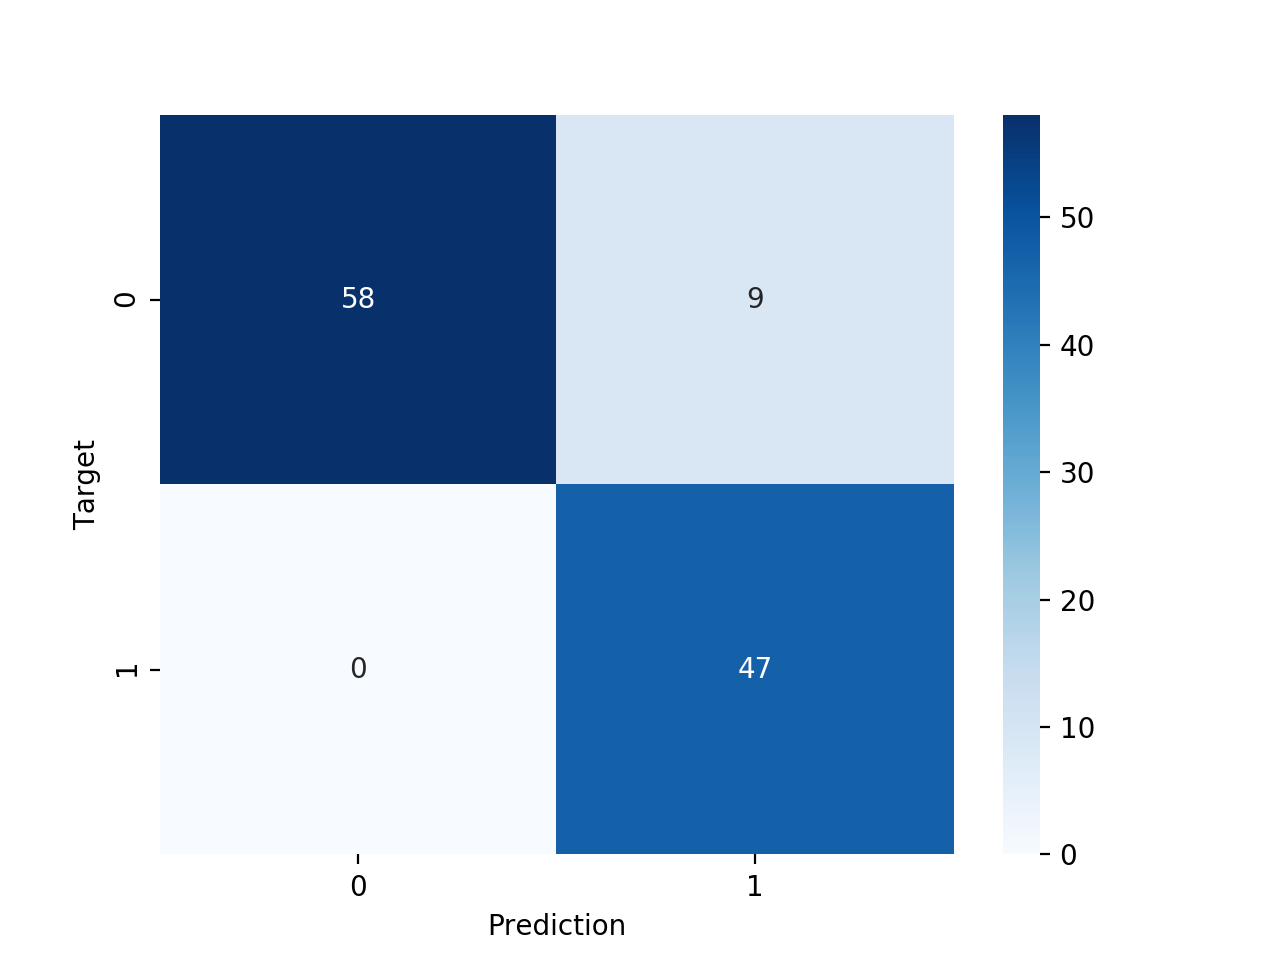

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/

Text(50.7222,0.5,'Target')

In [42]:
# 混同行列を確認してみる
matrix = confusion_matrix(t_test, y_test)
# 混同行列の可視化
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')

In [38]:
# 訓練済みモデルを保存する
import joblib

joblib.dump(clf, 'breast_cancer.pkl')

['breast_cancer.pkl']

In [39]:
# 保存したモデルを呼び出す場合
clf_load = joblib.load('breast_cancer.pkl')

### データを収集

In [40]:
from icrawler.builtin import GoogleImageCrawler

# root_dirで保存するフォルダを指定
crawler = GoogleImageCrawler(storage={'root_dir': 'crawler1'})

In [41]:
# 画像の取得
crawler.crawl(keyword='犬', max_num=50)

2019-10-16 07:04:28,299 - INFO - icrawler.crawler - start crawling...
2019-10-16 07:04:28,301 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-10-16 07:04:28,303 - INFO - feeder - thread feeder-001 exit
2019-10-16 07:04:28,303 - INFO - icrawler.crawler - starting 1 parser threads...
2019-10-16 07:04:28,320 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-10-16 07:04:28,996 - INFO - parser - parsing result page https://www.google.com/search?q=%E7%8A%AC&ijn=0&start=0&tbs=&tbm=isch
2019-10-16 07:04:29,303 - INFO - downloader - image #1	https://www.asahicom.jp/articles/images/AS20190719000785_commL.jpg
2019-10-16 07:04:29,452 - INFO - downloader - image #2	https://storage.tenki.jp/storage/static-images/suppl/article/image/2/27/277/27740/1/large.jpg
2019-10-16 07:04:29,550 - INFO - downloader - image #3	https://dol.ismcdn.jp/mwimgs/7/1/670m/img_71c53c1d81500a1cf73a4f543e72413f27838.jpg
2019-10-16 07:04:29,644 - INFO - downloader - image #4	https://www.newsweekj

In [3]:
import selenium

In [15]:
from selenium import webdriver

# 新規でブラウザが立ち上がる
browser = webdriver.Chrome()

In [16]:
url = 'https://sandbox.kikagaku.co.jp/test_scraping'
# 指定したURLへアクセス
browser.get(url)

In [17]:
# 要素を抽出
elem_email = browser.find_element_by_id('inputEmail')
elem_email.is_enabled()

True

In [18]:
# 抽出した要素に入力
elem_email.send_keys('test@kikagaku.co.jp')

In [23]:
# パスワードを入力
elem_pass = browser.find_element_by_id("inputPassword")
elem_pass.is_enabled()
elem_pass.send_keys('testpass')

In [24]:
# Sign inボタンのクリック
elem_btn = browser.find_element_by_id("btn")
elem_btn.click()

In [25]:
browser.quit()